**Loading The Picture**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch torchvision

**Loading VGG Pretrained Model**

In [ ]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

**Here in this Project, I will only consider the Features Part of the VGG 19 Model**

In [ ]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
for parameters in vgg.parameters():

  parameters.requires_grad_(False) #initially there is no gradient

**Moving The Model to the CUDA Device**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

**Preprocessing Images**

In [ ]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path,max_size=500):
  image  = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transforms = T.Compose([
                              T.Resize(size),
                              T.ToTensor(),
                              T.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229,0.224,0.225])]
      
  )
  image = img_transforms(image)

  image = image.unsqueeze(0) #(3, 745,500) -> (1,3,745,500)

  return image

In [ ]:
content_p = preprocess('/content/drive/MyDrive/Deep_Learning_Project/Monalisha_Picture.jpg')
style_p = preprocess('/content/drive/MyDrive/Deep_Learning_Project/Style_1.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)


print("Content Shape",content_p.shape) #Size of Both Content and Styles are displayed in Tensor Format
print("Style Shape",style_p.shape)

Content Shape torch.Size([1, 3, 745, 500])
Style Shape torch.Size([1, 3, 625, 500])


**Deprocessing Image**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def deprocess(tensor):

  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0) #(1,3,745,500) -> (3, 745,500)
  image = image.transpose(1,2,0) #(3, 745,500) -> (500,745,3)
  image = image * np.array([0.229,0.224,0.225]) + np.array([0.485, 0.456, 0.406])#denormalizing the image
  image = image.clip(0,1)

  return image

In [ ]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("Deprocessed Content : ",content_d.shape)
print("Deprocessed Style: ",style_d.shape)


Deprocessed Content :  (745, 500, 3)
Deprocessed Style:  (625, 500, 3)


**Lets Visulaize the Images!!!**

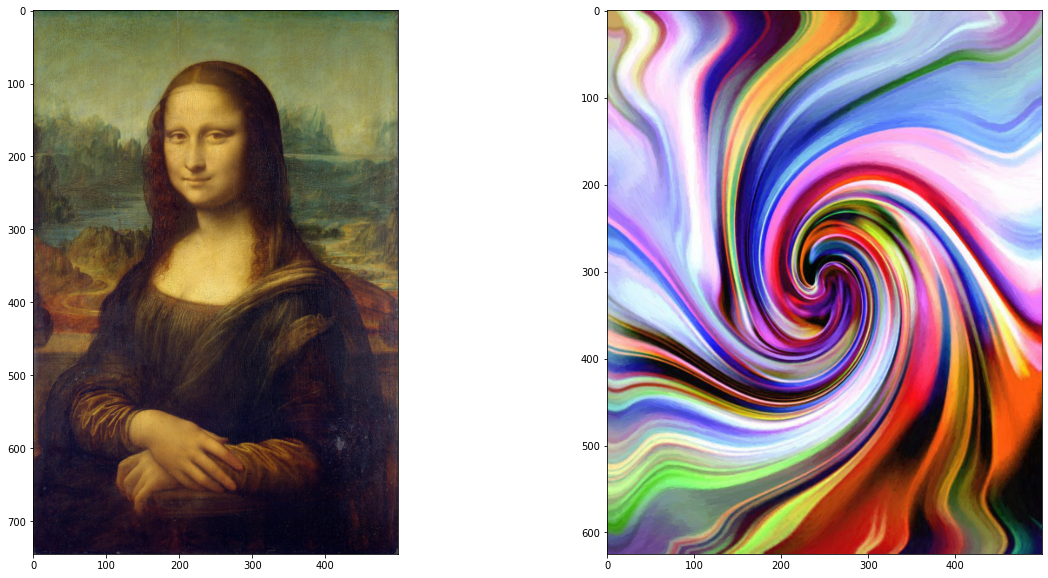

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.imshow(content_d)
ax2.imshow(style_d)

**Get Content, Style Features and Create Gram Matrix!!**

In [ ]:
def get_features(image,model):

  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10' : 'conv3_1',
      '19' : 'conv4_1',
      '21' : 'conv4_2',    #content_feature
      '28' : 'conv5_1'
  }

  x = image

  Features = {}

  for name,layer in model._modules.items():

    x = layer(x)

    if name in layers:

      Features[layers[name]] = x

  return Features

In [ ]:
content_f = get_features(content_p,vgg)
style_f = get_features(style_p,vgg)

In [ ]:
def gram_matrix(tensor):
  b,c,h,w = tensor.size()
  tensor = tensor.view(c,h*w)
  gram = torch.mm(tensor,tensor.t())
  return gram

In [ ]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f}

**Creating Style and Content Loss Function!!**

In [ ]:
def content_loss(target_conv4_2,content_conv4_2):

  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [ ]:
style_weights = {
    'conv1_1' : 1.0,     ##Creating Style Weights For Creating the Style Loss Function
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [ ]:
def style_loss(style_weights,target_features,style_grams):
  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]  #taking features from that particular layer of vgg model
    target_gram = gram_matrix(target_f) #taking Gram Matrix from the features of that particular layer
    style_gram = style_grams[layer]
    b,c,h,w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)

  return loss


In [ ]:
target = content_p.clone().requires_grad_(True).to(device) #applying gradient descent on parameters of vgg
target_f = get_features(target,vgg)
print("Content Loss: ",content_loss(target_f['conv4_2'],content_f['conv4_2']))
print("Style Loss:",style_loss(style_weights,target_f,style_grams))

Content Loss:  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss: tensor(815.5887, device='cuda:0', grad_fn=<AddBackward0>)


**Training Loop**

In [ ]:
from torch import optim

optimizer = optim.Adam([target],lr=0.003)
alpha = 1
beta = 1e5

epochs = 3000
show_every = 500

**Creating Total Loss Function**

In [ ]:
def total_loss(c_loss,s_loss,alpha,beta):

  loss = alpha * c_loss + beta * s_loss
  return loss

In [ ]:
results = []

for i in range(epochs):
  target_f = get_features(target,vgg)

  c_loss = content_loss(target_f['conv4_2'],content_f['conv4_2'])
  s_loss = style_loss(style_weights,target_f,style_grams)
  t_loss = total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print("Total  Loss at Epoch {}: {}".format(i,t_loss))
    results.append(deprocess(target.detach()))

Total  Loss at Epoch 0: 81558872.0
Total  Loss at Epoch 500: 8421158.0
Total  Loss at Epoch 1000: 4265370.0
Total  Loss at Epoch 1500: 2210936.0
Total  Loss at Epoch 2000: 1284864.25
Total  Loss at Epoch 2500: 815053.25


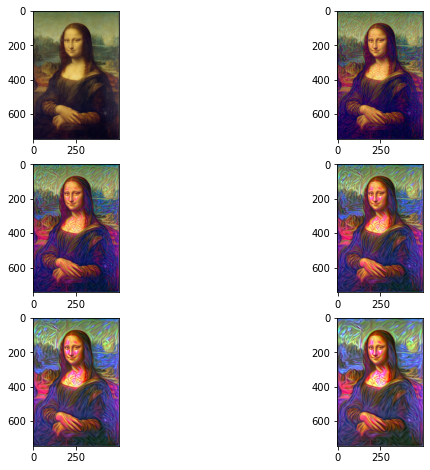

In [ ]:
plt.figure(figsize=(10,8))

for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()


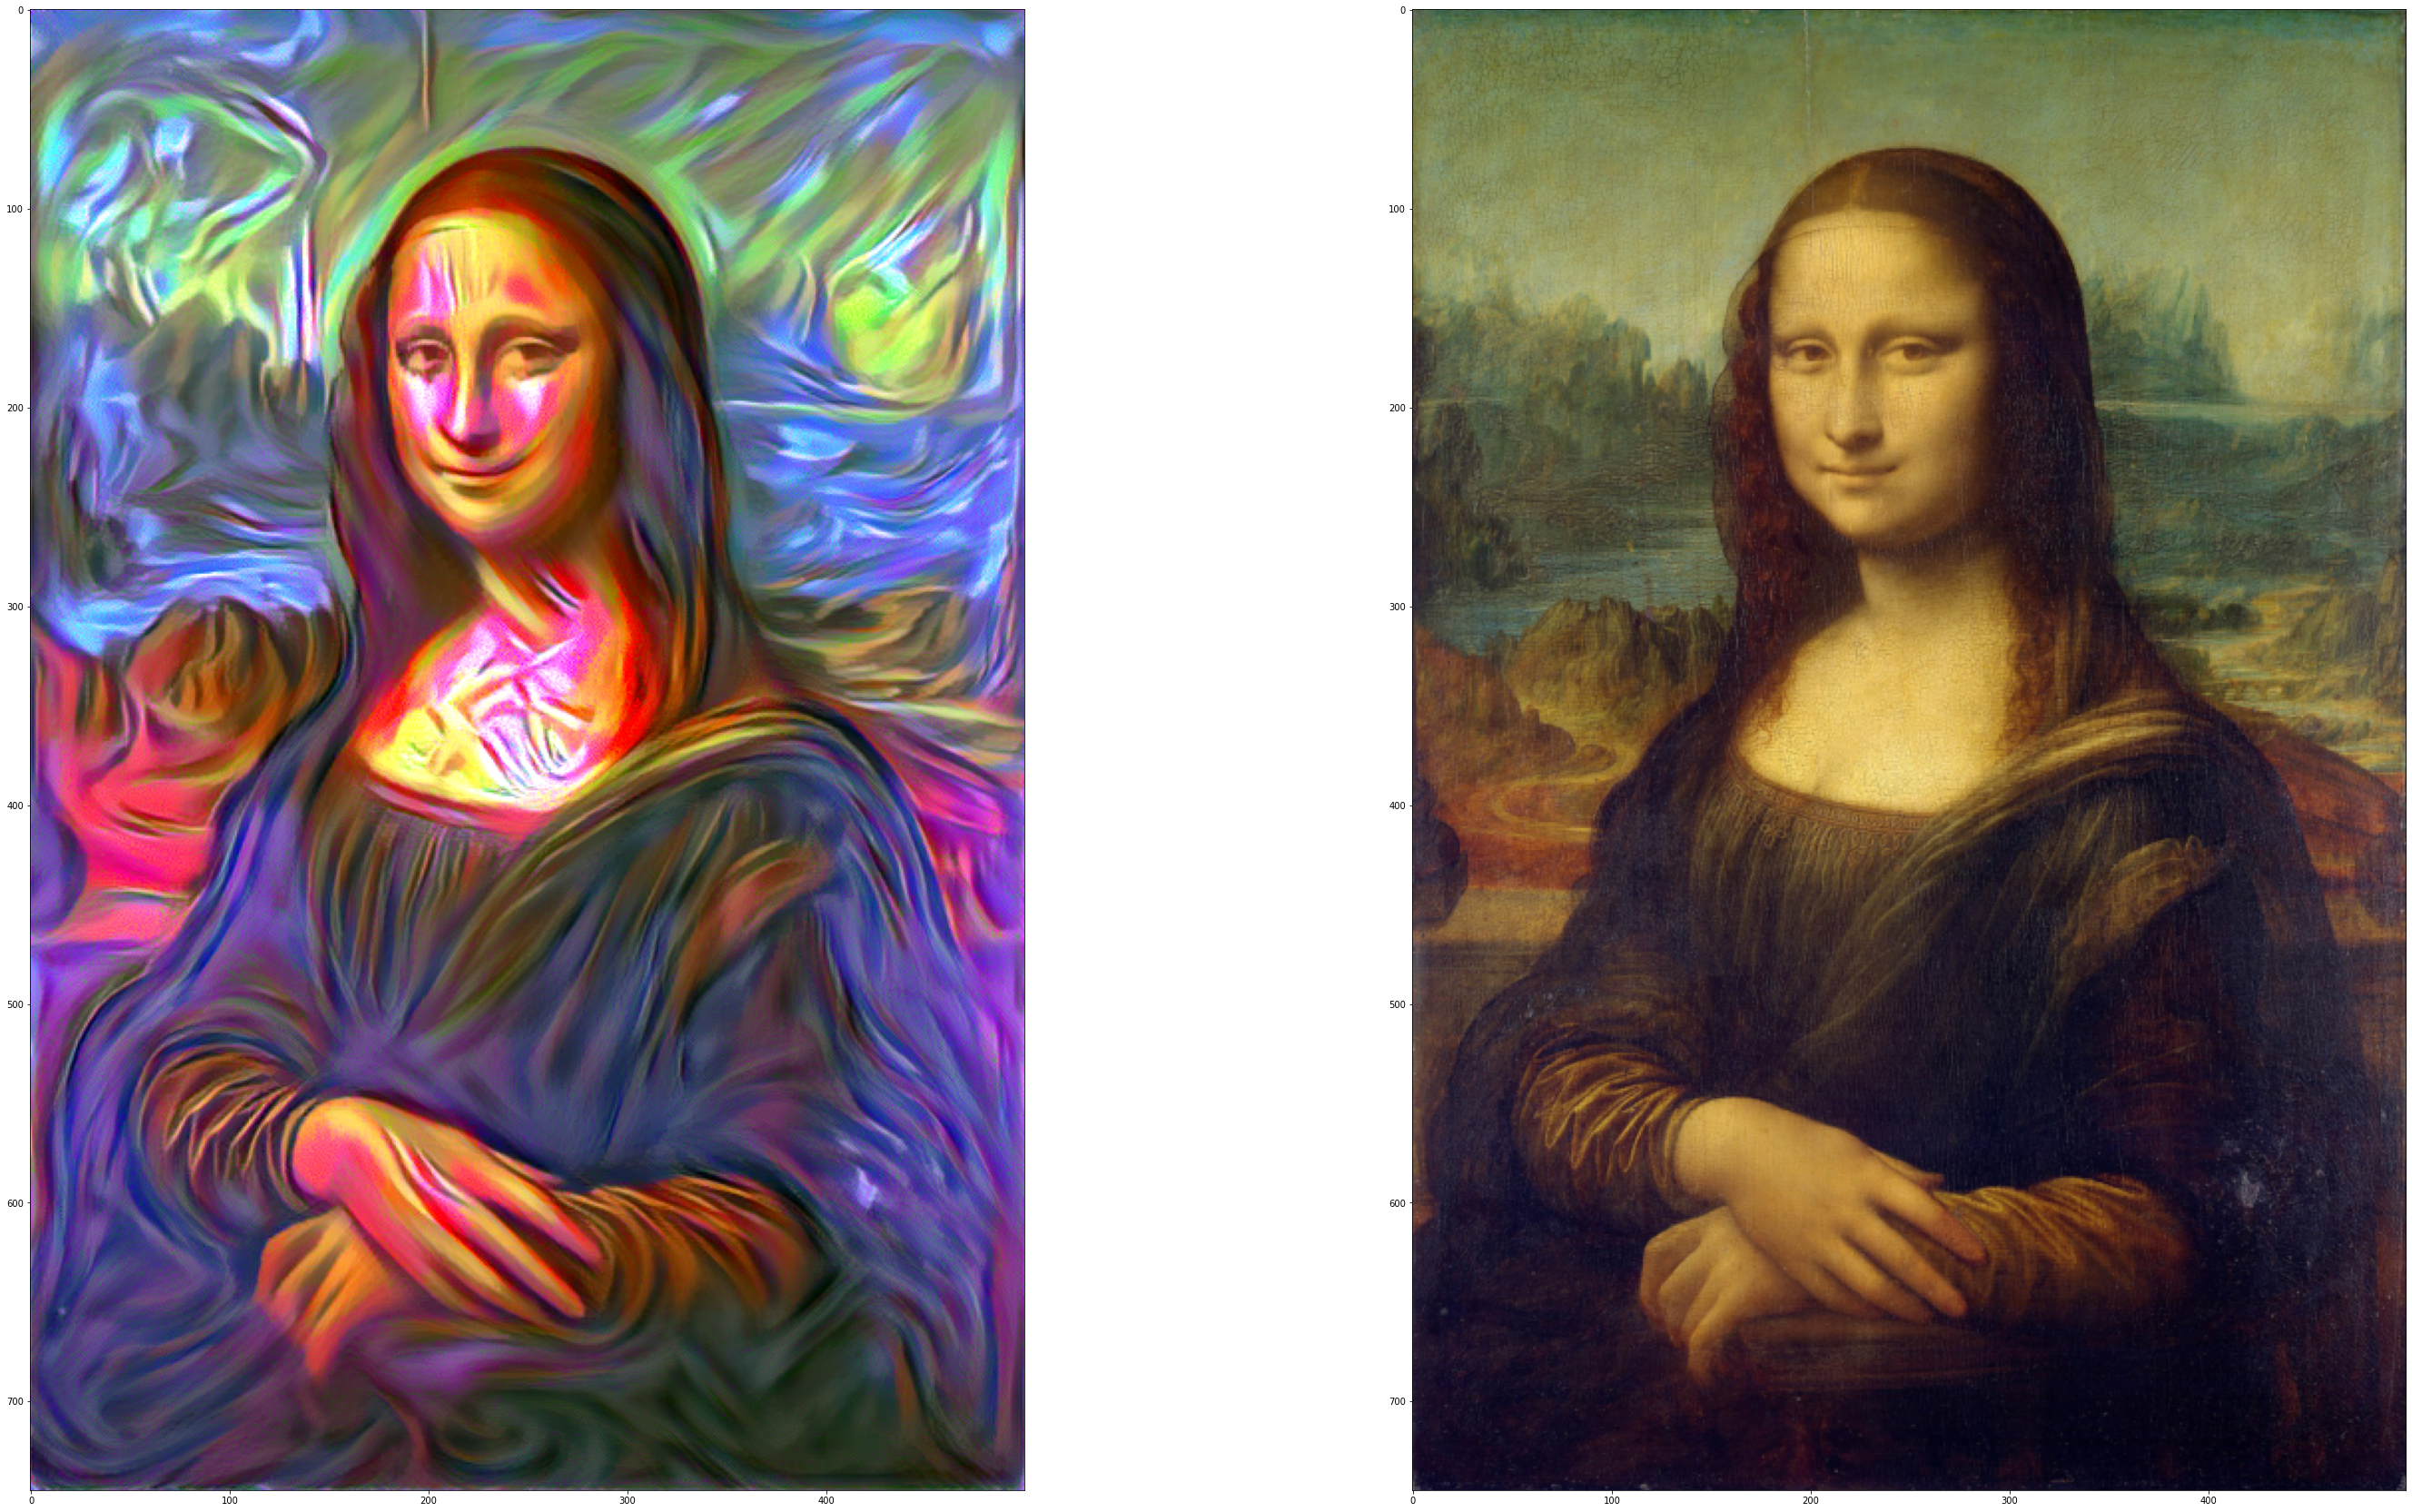

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (50,30))
ax1.imshow(target_copy)
ax2.imshow(content_copy)